In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### PreTrain Trainset

In [99]:
df_train = pd.read_csv('train_data.csv')
df_train.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


In [100]:
df_train.drop('id',axis=1,inplace=True)

In [101]:
df_train.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


In [102]:
df_train['stops'].value_counts()

stops
one            16666
zero            2440
two_or_more      894
Name: count, dtype: int64

In [103]:
df_train['stops'][df_train['stops']=='two_or_more'] = 'four'

In [104]:
df_train['stops'] = df_train['stops'].map({'one':1,'zero':0,'four':4})

In [105]:
df_train.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,Vistara,UK-810,Bangalore,Early_Morning,1,Night,Mumbai,Economy,14.25,21,7212
1,SpiceJet,SG-5094,Hyderabad,Evening,0,Night,Kolkata,Economy,1.75,7,5292
2,Vistara,UK-846,Bangalore,Morning,1,Evening,Delhi,Business,9.58,5,60553
3,Vistara,UK-706,Kolkata,Morning,1,Evening,Hyderabad,Economy,6.75,28,5760
4,Indigo,6E-5394,Chennai,Early_Morning,0,Morning,Mumbai,Economy,2.00,4,10712


In [106]:
df_train['arrival_time'].value_counts()

arrival_time
Night            6142
Evening          5316
Morning          4086
Afternoon        2536
Early_Morning    1004
Late_Night        916
Name: count, dtype: int64

In [107]:
df_train['arrival_time'] = df_train['arrival_time'].map({'Early_Morning':0,'Morning':1,'Afternoon':2,'Evening':4,'Night':5,'Late_Night':6})

In [108]:
df_train.sample(5)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
10545,Indigo,6E-7115,Kolkata,Evening,1,5,Bangalore,Economy,5.25,47,3860
18506,Vistara,UK-772,Kolkata,Morning,4,0,Hyderabad,Economy,21.42,40,7572
19343,Vistara,UK-985,Delhi,Evening,1,1,Chennai,Business,16.00,4,73784
6164,Vistara,UK-828,Chennai,Early_Morning,1,4,Delhi,Economy,12.75,29,5606
1574,GO_FIRST,G8-803,Bangalore,Evening,1,6,Chennai,Economy,6.33,15,12920


In [109]:
df_train['departure_time'].value_counts()

departure_time
Morning          4738
Early_Morning    4432
Evening          4341
Night            3231
Afternoon        3166
Late_Night         92
Name: count, dtype: int64

In [110]:
df_train['departure_time'] = df_train['departure_time'].map({'Early_Morning':0,'Morning':1,'Afternoon':2,'Evening':4,'Night':5,'Late_Night':6})

In [111]:
df_train.sample(5)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
14281,Air_India,AI-440,Chennai,0,1,2,Kolkata,Economy,8.33,26,5309
10852,Vistara,UK-772,Kolkata,1,1,6,Delhi,Business,14.50,27,53743
5498,Air_India,AI-481,Delhi,1,1,1,Mumbai,Economy,25.08,26,4161
18320,Air_India,AI-867,Mumbai,5,0,5,Delhi,Business,2.25,25,22140
810,Air_India,AI-698,Hyderabad,5,1,1,Delhi,Business,12.00,39,39499


In [112]:
df_train['source_city'].value_counts()

source_city
Mumbai       4068
Delhi        4022
Bangalore    3486
Kolkata      3092
Hyderabad    2748
Chennai      2584
Name: count, dtype: int64

In [113]:
df_train['source_city'] = df_train['source_city'].map({'Chennai':0,'Hyderabad':1,'Kolkata':2,'Bangalore':3,'Delhi':4,'Mumbai':5})

In [114]:
df_train['destination_city'].value_counts()

destination_city
Mumbai       3918
Delhi        3825
Bangalore    3425
Kolkata      3323
Hyderabad    2814
Chennai      2695
Name: count, dtype: int64

In [115]:
df_train['destination_city'] = df_train['destination_city'].map({'Chennai':0,'Hyderabad':1,'Kolkata':2,'Bangalore':3,'Delhi':4,'Mumbai':5})

In [116]:
df_train.sample(5)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
3349,Air_India,AI-763,2,0,1,5,1,Business,14.58,16,67441
18462,GO_FIRST,G8-285,3,2,1,6,5,Economy,9.58,38,9306
19004,Indigo,6E-6151,1,1,1,2,3,Economy,4.25,15,4453
15303,Air_India,AI-665,4,0,1,4,3,Business,10.50,43,42457
6635,Vistara,UK-928,5,0,1,2,1,Economy,6.08,8,10058


In [117]:
df_train['class'].value_counts()

class
Economy     13753
Business     6247
Name: count, dtype: int64

In [118]:
df_train['class'] = df_train['class'].map({'Economy':0,'Business':1})

In [119]:
df_train.sample(5)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
17931,Vistara,UK-613,5,2,1,4,4,1,4.50,32,41325
6911,GO_FIRST,G8-165,4,0,1,2,5,0,8.00,31,5584
8555,Vistara,UK-847,4,1,1,2,3,1,4.83,44,48234
2549,Vistara,UK-818,3,4,0,5,4,1,2.75,36,32923
2343,Indigo,6E-822,2,1,1,5,1,0,8.83,2,20034


In [120]:
df_train['airline'].value_counts()

airline
Vistara      8535
Air_India    5371
Indigo       2924
GO_FIRST     1508
AirAsia      1056
SpiceJet      606
Name: count, dtype: int64

In [121]:
df_train['airline'] = df_train['airline'].map({'SpiceJet':0,'AirAsia':1,'GO_FIRST':2,'Indigo':3,'Air_India':4,'Vistara':5})

In [122]:
df_train.sample(5)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
194,4,AI-770,2,5,1,4,5,1,23.50,19,50271
7440,5,UK-822,0,1,1,5,4,0,14.00,24,8803
10526,5,UK-776,2,4,1,1,3,0,17.17,9,13773
14715,4,AI-766,0,1,1,5,1,0,13.00,24,7442
6873,5,UK-866,3,5,1,1,4,1,10.92,43,50361


In [123]:
df_train['flight'].value_counts(sort=True)

flight
UK-706     208
UK-720     190
UK-822     178
UK-836     169
UK-772     169
          ... 
6E-2471      1
6E-821       1
SG-1031      1
6E-759       1
6E-7201      1
Name: count, Length: 1310, dtype: int64

In [124]:
from sklearn.preprocessing import LabelEncoder

In [125]:
le = LabelEncoder()
df_train['flight'] = le.fit_transform(df_train['flight'])

In [126]:
df_train.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,5,1214,3,0,1,5,5,0,14.25,21,7212
1,0,1126,1,4,0,5,2,0,1.75,7,5292
2,5,1245,3,1,1,4,4,1,9.58,5,60553
3,5,1191,2,1,1,4,1,0,6.75,28,5760
4,3,275,0,0,0,1,5,0,2.00,4,10712


In [127]:
df_train.corrwith(df_train['price']).sort_values(ascending=False)

price               1.000000
class               0.937868
airline             0.427821
flight              0.303288
duration            0.213158
stops               0.032668
departure_time      0.030649
source_city         0.012656
arrival_time        0.003534
destination_city   -0.026367
days_left          -0.102545
dtype: float64

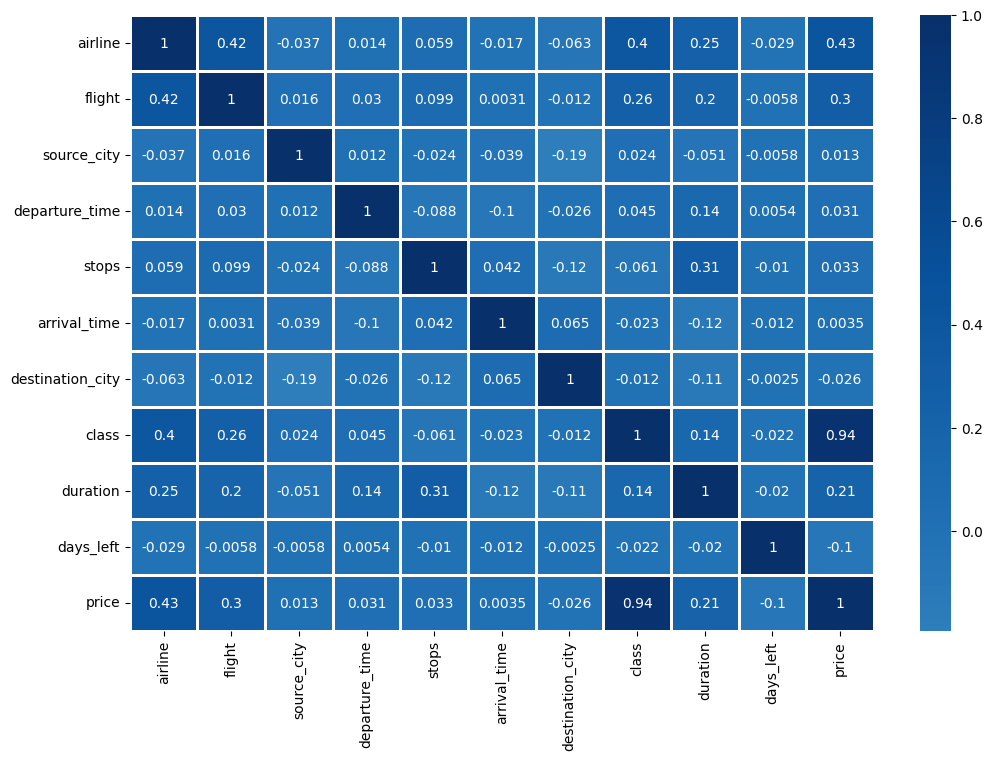

In [128]:
plt.figure(figsize=(12,8))
sns.heatmap(df_train.corr(),annot=True,linewidths=2,cmap='Blues',center=-1)
plt.show()

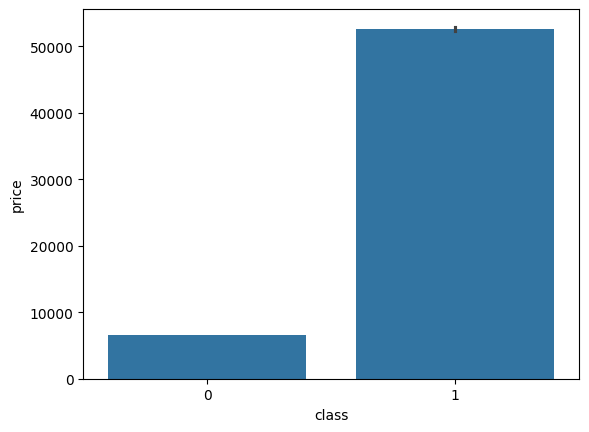

In [129]:
sns.barplot(data=df_train,x='class',y='price')
plt.show()

In [130]:
X = df_train.drop('price',axis=1)
y = df_train['price']

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
X_train,X_test,y_train,y_test = train_test_split(X.values,y,test_size=0.2,random_state=42)

In [133]:
X_train.shape

(16000, 10)

In [134]:
y_train.shape

(16000,)

In [135]:
X_test.shape

(4000, 10)

In [136]:
y_test.shape

(4000,)

In [137]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [138]:
from sklearn.metrics import mean_absolute_error

In [139]:
y_pred = lr.predict(X_test)
print(mean_absolute_error(y_test,y_pred))

4413.97303431143


In [140]:
from sklearn.neighbors import KNeighborsRegressor

In [141]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [142]:
y_pred_knn = knn.predict(X_test)
mean_absolute_error(y_test,y_pred_knn)

14450.42845

In [143]:
from sklearn.svm import SVR
svc = SVR()
svc.fit(X_train,y_train)

SVR()

In [144]:
y_scv = svc.predict(X_test)
mean_absolute_error(y_test,y_scv)

16236.22492017288

In [200]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [201]:
y_gnb = gnb.predict(X_test)
mean_absolute_error(y_test,y_gnb)

2716.86425

In [194]:
from sklearn.model_selection import cross_val_score

In [196]:
result = cross_val_score(gnb,X_test,y_test,scoring='neg_mean_absolute_error',cv=5)
-result.mean(),result.std()

(3152.178, 290.80794566775506)

In [150]:
from sklearn.linear_model import Ridge
rd = Ridge()
rd.fit(X_train,y_train)

Ridge()

In [151]:
y_ride = rd.predict(X_test)
mean_absolute_error(y_test,y_ride)

4414.551623859258

In [152]:
from sklearn.linear_model import Lasso
ls = Lasso(alpha=10)
ls.fit(X_train,y_train)

Lasso(alpha=10)

In [153]:
y_ls = ls.predict(X_test)
mean_absolute_error(y_test,y_ls)

4413.816273061573

### PreTrain Testset

In [154]:
df_test = pd.read_csv('test_data.csv')
df_test.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,1,Air_India,AI-765,Kolkata,Evening,one,Night,Delhi,Business,28.25,2
1,2,Vistara,UK-747,Delhi,Early_Morning,one,Night,Mumbai,Business,13.83,34
2,3,Air_India,AI-570,Mumbai,Early_Morning,zero,Early_Morning,Chennai,Business,2.00,30
3,4,AirAsia,I5-974,Hyderabad,Night,one,Late_Night,Delhi,Economy,5.17,26
4,5,Air_India,AI-770,Kolkata,Night,one,Afternoon,Mumbai,Economy,16.33,35


In [155]:
df_test.drop('id',axis=1,inplace=True)

In [156]:
df_test.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,Air_India,AI-765,Kolkata,Evening,one,Night,Delhi,Business,28.25,2
1,Vistara,UK-747,Delhi,Early_Morning,one,Night,Mumbai,Business,13.83,34
2,Air_India,AI-570,Mumbai,Early_Morning,zero,Early_Morning,Chennai,Business,2.00,30
3,AirAsia,I5-974,Hyderabad,Night,one,Late_Night,Delhi,Economy,5.17,26
4,Air_India,AI-770,Kolkata,Night,one,Afternoon,Mumbai,Economy,16.33,35


In [157]:
df_test['stops'].value_counts()

stops
one            4220
zero            584
two_or_more     196
Name: count, dtype: int64

In [158]:
df_test['stops'][df_test['stops']=='two_or_more'] = 'four'

In [159]:
df_test['stops'] = df_test['stops'].map({'one':1,'zero':0,'four':4})

In [160]:
df_test.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,Air_India,AI-765,Kolkata,Evening,1,Night,Delhi,Business,28.25,2
1,Vistara,UK-747,Delhi,Early_Morning,1,Night,Mumbai,Business,13.83,34
2,Air_India,AI-570,Mumbai,Early_Morning,0,Early_Morning,Chennai,Business,2.00,30
3,AirAsia,I5-974,Hyderabad,Night,1,Late_Night,Delhi,Economy,5.17,26
4,Air_India,AI-770,Kolkata,Night,1,Afternoon,Mumbai,Economy,16.33,35


In [161]:
df_test['arrival_time'].value_counts()

arrival_time
Night            1510
Evening          1320
Morning          1045
Afternoon         655
Early_Morning     250
Late_Night        220
Name: count, dtype: int64

In [162]:
df_test['arrival_time'] = df_test['arrival_time'].map({'Early_Morning':0,'Morning':1,'Afternoon':2,'Evening':4,'Night':5,'Late_Night':6})

In [163]:
df_test.sample(5)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
3049,Indigo,6E-5312,Mumbai,Morning,1,4,Bangalore,Economy,8.58,49
4931,Air_India,AI-610,Bangalore,Evening,1,5,Hyderabad,Economy,26.42,24
4236,Vistara,UK-858,Bangalore,Early_Morning,1,2,Delhi,Economy,7.83,12
3817,Vistara,UK-826,Chennai,Afternoon,1,4,Bangalore,Business,5.25,20
4859,Air_India,AI-804,Bangalore,Early_Morning,1,2,Mumbai,Business,6.67,45


In [164]:
df_test['departure_time'].value_counts()

departure_time
Early_Morning    1150
Morning          1135
Evening          1118
Afternoon         800
Night             778
Late_Night         19
Name: count, dtype: int64

In [165]:
df_test['departure_time'] = df_test['departure_time'].map({'Early_Morning':0,'Morning':1,'Afternoon':2,'Evening':4,'Night':5,'Late_Night':6})

In [166]:
df_test.sample(5)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
3693,Vistara,UK-808,Bangalore,0,1,2,Mumbai,Business,6.00,6
3767,Air_India,AI-748,Bangalore,6,1,4,Delhi,Business,15.33,39
3512,Air_India,AI-473,Delhi,4,1,4,Mumbai,Economy,22.75,42
763,Air_India,AI-9876,Bangalore,2,1,4,Hyderabad,Economy,3.75,6
2149,Indigo,6E-725,Kolkata,4,1,0,Mumbai,Economy,9.92,17


In [167]:
df_test['source_city'].value_counts()

source_city
Mumbai       1018
Delhi        1002
Bangalore     887
Kolkata       781
Hyderabad     676
Chennai       636
Name: count, dtype: int64

In [168]:
df_test['source_city'] = df_test['source_city'].map({'Chennai':0,'Hyderabad':1,'Kolkata':2,'Bangalore':3,'Delhi':4,'Mumbai':5})

In [169]:
df_test['destination_city'].value_counts()

destination_city
Mumbai       949
Delhi        934
Bangalore    910
Kolkata      839
Hyderabad    710
Chennai      658
Name: count, dtype: int64

In [170]:
df_test['destination_city'] = df_test['destination_city'].map({'Chennai':0,'Hyderabad':1,'Kolkata':2,'Bangalore':3,'Delhi':4,'Mumbai':5})

In [171]:
df_test.sample(5)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
4792,Vistara,UK-821,5,0,1,5,4,Business,17.17,30
2880,Indigo,6E-212,4,2,1,5,5,Economy,8.08,45
1407,Vistara,UK-870,1,5,1,5,2,Economy,26.17,11
1697,AirAsia,I5-556,2,2,1,5,3,Economy,10.25,47
943,GO_FIRST,G8-391,5,2,1,5,1,Economy,9.33,48


In [172]:
df_test['class'].value_counts()

class
Economy     3473
Business    1527
Name: count, dtype: int64

In [173]:
df_test['class'] = df_test['class'].map({'Economy':0,'Business':1})

In [174]:
df_test.sample(5)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
3579,Vistara,UK-953,4,5,1,1,3,1,12.17,27
1356,Air_India,AI-429,4,1,0,2,0,1,2.83,40
3327,Air_India,AI-526,2,4,1,5,4,0,28.00,10
2871,Vistara,UK-809,4,4,1,1,5,1,12.42,12
1047,Vistara,UK-776,2,4,0,5,5,0,2.75,42


In [175]:
df_test['airline'].value_counts()

airline
Vistara      2064
Air_India    1398
Indigo        724
GO_FIRST      393
AirAsia       263
SpiceJet      158
Name: count, dtype: int64

In [176]:
df_test['airline'] = df_test['airline'].map({'SpiceJet':0,'AirAsia':1,'GO_FIRST':2,'Indigo':3,'Air_India':4,'Vistara':5})

In [177]:
df_test.sample(5)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
1164,3,6E-893,2,1,1,4,5,0,10.17,29
184,5,UK-859,4,1,0,2,1,1,2.17,49
2119,5,UK-963,4,1,1,5,0,0,14.25,38
788,5,UK-985,4,4,1,1,2,1,13.83,35
2469,5,UK-975,4,0,1,2,1,0,6.50,18


In [178]:
df_test['flight'].value_counts(sort=True)

flight
UK-826     46
UK-706     46
UK-772     44
UK-860     43
UK-720     42
           ..
6E-7127     1
6E-7292     1
G8-2504     1
G8-506      1
6E-186      1
Name: count, Length: 941, dtype: int64

In [179]:
from sklearn.preprocessing import LabelEncoder

In [180]:
le = LabelEncoder()
df_test['flight'] = le.fit_transform(df_test['flight'])

In [181]:
df_test.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,4,452,2,4,1,5,4,1,28.25,2
1,5,834,4,0,1,5,5,1,13.83,34
2,4,401,5,0,0,0,0,1,2.00,30
3,1,723,1,5,1,6,4,0,5.17,26
4,4,456,2,5,1,2,5,0,16.33,35


In [202]:
y_predict = gnb.predict(df_test.values)

In [203]:
y_predict.reshape(-1,1)

array([[53743],
       [53164],
       [23484],
       ...,
       [50271],
       [45693],
       [53743]], dtype=int64)

In [204]:
y_predict[10]

6702

In [205]:
df_sample = pd.read_csv('sample_solution.csv')
df_sample.head()

,id,price
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [206]:
df_sample['price'] = y_predict

In [207]:
df_sample

,id,price
0,1,53743
1,2,53164
2,3,23484
3,4,2276
4,5,6048
...,...,...
4995,4996,60978
4996,4997,6174
4997,4998,50271
4998,4999,45693


In [208]:
df_sample.to_csv('SAMPLE.csv',index=False)
df_test.to_csv('TEST.csv',index=False)
df_train.to_csv('TRAIN.csv',index=False)

In [210]:
df = pd.read_csv('SAMPLE.csv')
df.head()

,id,price
0,1,53743
1,2,53164
2,3,23484
3,4,2276
4,5,6048
